# ONYXDATA CHALLENGE (FEB 2022)

## Problem Statement


#### This month we are analyzing the USA International Travel dataset! Can you identify the USA's favorite travel destination?

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.ticker import PercentFormatter
import pycountry_convert as pc

## Loading the dataset

In [2]:
df=pd.read_csv("Travel1.csv")

In [3]:
df

,Country,Month,Total Passengers
0,United Kingdom,1/6/2021,169607
1,Panama,1/6/2021,228568
2,Japan,1/6/2021,71990
3,Chile,1/6/2021,13210
4,Germany,1/6/2021,250995
...,...,...,...
17212,Peru,1/1/1990,36498
17213,Panama,1/1/1990,14813
17214,Canada,1/1/1990,822111
17215,Venezuela,1/1/1990,78578


## Understanding and preparation of the dataset

In [4]:
df.head(5)

,Country,Month,Total Passengers
0,United Kingdom,1/6/2021,169607
1,Panama,1/6/2021,228568
2,Japan,1/6/2021,71990
3,Chile,1/6/2021,13210
4,Germany,1/6/2021,250995


In [5]:
df.tail(5)

,Country,Month,Total Passengers
17212,Peru,1/1/1990,36498
17213,Panama,1/1/1990,14813
17214,Canada,1/1/1990,822111
17215,Venezuela,1/1/1990,78578
17216,Aruba,1/1/1990,33395


In [6]:
df.dtypes

Country             object
Month               object
Total Passengers     int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17217 entries, 0 to 17216
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           17217 non-null  object
 1   Month             17217 non-null  object
 2   Total Passengers  17217 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 403.6+ KB


In [8]:
df.describe()

,Total Passengers
count,1.721700e+04
mean,2.433207e+05
std,3.916270e+05
min,2.200000e+01
25%,5.512700e+04
50%,9.951300e+04
75%,2.205740e+05
max,3.067783e+06


### Checking for missing values

In [9]:
df.isnull().sum()

Country             0
Month               0
Total Passengers    0
dtype: int64

#### There are no missing values

In [10]:
df

,Country,Month,Total Passengers
0,United Kingdom,1/6/2021,169607
1,Panama,1/6/2021,228568
2,Japan,1/6/2021,71990
3,Chile,1/6/2021,13210
4,Germany,1/6/2021,250995
...,...,...,...
17212,Peru,1/1/1990,36498
17213,Panama,1/1/1990,14813
17214,Canada,1/1/1990,822111
17215,Venezuela,1/1/1990,78578


In [11]:
heatmap=df.drop(['Country','Month'],axis=1)

In [12]:
# sns.heatmap(data=heatmap,yticklabels=False,linewidths=0,annot=True)

## Data Visualisation

In [13]:
df.Country.value_counts().count()

46

#### 1.Total of '46' different countries

In [14]:
df['Total Passengers'].sum()

4189253119

#### 2. '4.18 billion' passengers have travelled 

In [15]:
df1=df.copy()

In [16]:
df1['Date']=pd.to_datetime(df1['Month'],dayfirst=True)
df1['year'], df1['month'] = df1['Date'].dt.year, df1['Date'].dt.month
df1

,Country,Month,Total Passengers,Date,year,month
0,United Kingdom,1/6/2021,169607,2021-06-01,2021,6
1,Panama,1/6/2021,228568,2021-06-01,2021,6
2,Japan,1/6/2021,71990,2021-06-01,2021,6
3,Chile,1/6/2021,13210,2021-06-01,2021,6
4,Germany,1/6/2021,250995,2021-06-01,2021,6
...,...,...,...,...,...,...
17212,Peru,1/1/1990,36498,1990-01-01,1990,1
17213,Panama,1/1/1990,14813,1990-01-01,1990,1
17214,Canada,1/1/1990,822111,1990-01-01,1990,1
17215,Venezuela,1/1/1990,78578,1990-01-01,1990,1


In [17]:
df1.year.value_counts().count()

32

#### 3.The Dataset contains information about passengers who have travelled for the last  '32' years

#### 4.Most visited countries of all time

In [18]:
a=df.groupby('Country')['Total Passengers'].sum()
a=pd.DataFrame(data=a)
a=a.reset_index()

In [19]:
a

,Country,Total Passengers
0,Antilles,24083044
1,Argentina,32152512
2,Aruba,30869772
3,Atlantic Ocean,21447345
4,Australia,54614844
5,Bahamas,68906642
6,Belgium,28345369
7,Brazil,90089064
8,Canada,600780824
9,Cayman Islands,20373325


In [20]:
most_visited=a.sort_values(by=['Total Passengers'],ascending=False).head(5)

In [21]:
most_visited

,Country,Total Passengers
8,Canada,600780824
30,Mexico,523517834
44,United Kingdom,472726270
29,Japan,360191482
19,Germany,244300830


C:\Users\sanke\AppData\Local\Temp/ipykernel_14672/488165663.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0','100M','200M','300M','400M','500M','600M'])


Text(0.5, 0, 'Total Passengers (Million)')

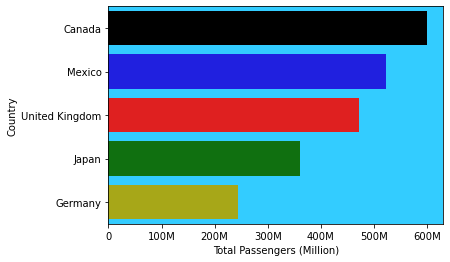

In [24]:
ax = plt.axes()
ax.set_facecolor("#33ccff")
sns.barplot(x="Total Passengers", y="Country", data=most_visited , color="r",ci = 95,orient='h',palette=["k", "b", "r","g","y"])
ax.set_xticklabels(['0','100M','200M','300M','400M','500M','600M'])
plt.xlabel("Total Passengers (Million)")

##### "Canada" is the most visited country

#### 5.Which month people have travelled the most?

In [25]:
b=df1.groupby('month')['Total Passengers'].sum()
b=pd.DataFrame(data=b)
b=b.reset_index()

In [26]:
b

,month,Total Passengers
0,1,339982410
1,2,296309277
2,3,354302801
3,4,335893679
4,5,350924866
5,6,381861199
6,7,409804895
7,8,407811704
8,9,332057178
9,10,330879462


In [28]:
b.sort_values(by=['Total Passengers'],ascending=False).head(5)

,month,Total Passengers
6,7,409804895
7,8,407811704
5,6,381861199
2,3,354302801
4,5,350924866


In [29]:
b["Total Passengers"].sum() 

4189253119

([<matplotlib.patches.Wedge at 0x24b268ee130>,
 [Text(1.7901964024538, 0.46657994024762056, 'Jan'),
  Text(1.3015727430135748, 1.1697898933757802, 'Feb'),
  Text(0.6356928335786546, 1.7373527624914697, 'Mar'),
  Text(-0.3237993577948838, 1.9229284895418293, 'Apr'),
  Text(-1.1659703719438854, 1.4363192861439402, 'May'),
  Text(-1.7444740812105266, 0.6158816282246857, 'Jun'),
  Text(-1.8872886984391668, -0.4905521060435839, 'Jul'),
  Text(-1.2612204719314577, -1.4872198630938842, 'Aug'),
  Text(-0.27374229576171677, -1.8296352520409922, 'Sept'),
  Text(0.6661467353961174, -1.8326888789211049, 'Oct'),
  Text(1.4365173867404055, -1.3186803242607803, 'Nov'),
  Text(1.7898781724850477, -0.4677992386286942, 'Dec')],
 [Text(1.0644411041617188, 0.2774259104175041, '8.12%'),
  Text(0.743755853150614, 0.6684513676433028, '7.07%'),
  Text(0.3779795226683892, 1.0330205614814143, '8.46%'),
  Text(-0.19926114325839003, 1.1833406089488179, '8.02%'),
  Text(-0.6932796806152831, 0.8540276836531535, '8.

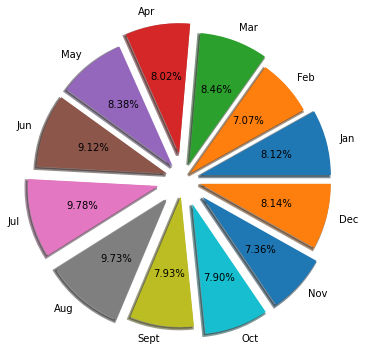

In [30]:
explode = (0.2, 0.1, 0.2, 0.3, 0.2, 0.2,0.3,0.3,0.2,0.3,0.3,0.2)
Month=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
plt.pie(x='Total Passengers',data=b,explode=explode,labels=Month,shadow=True,startangle = 0,autopct='%1.2f%%', radius=1.5,wedgeprops = {'linewidth': 3})

##### People have travelled the most in the month of "July"

#### 6.Which year people have travelled the most?

In [31]:
c=df1.groupby('year')['Total Passengers'].sum()
c=pd.DataFrame(data=c)
c=c.reset_index()

In [32]:
c

,year,Total Passengers
0,1990,74101824
1,1991,71293980
2,1992,77514502
3,1993,81808793
4,1994,85757530
5,1995,92853284
6,1996,101231951
7,1997,107942210
8,1998,113452026
9,1999,120044022


In [33]:
c.sort_values(by=['Total Passengers'],ascending=False).head(5)

,year,Total Passengers
29,2019,223595024
28,2018,219767977
27,2017,208374105
26,2016,199237334
25,2015,189302951


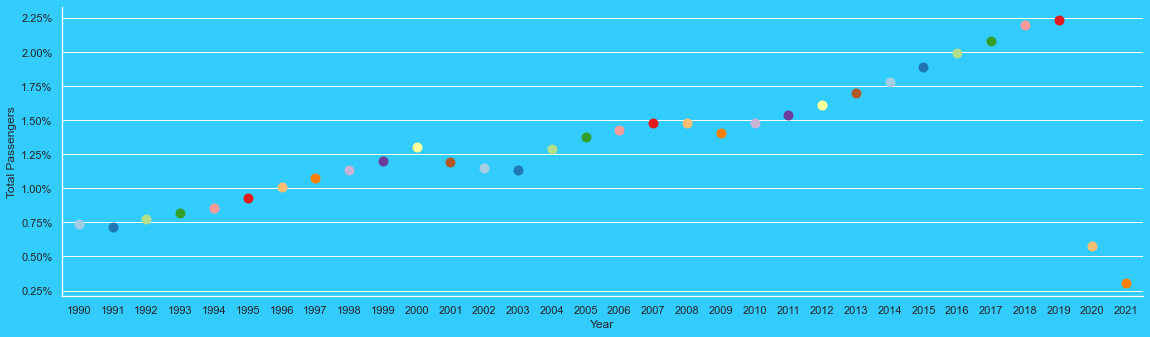

In [34]:
sns.set(rc={'axes.facecolor':"#33ccff",'figure.facecolor':"#33ccff"})
g=sns.catplot(x="year", y="Total Passengers",kind="swarm", data=c,aspect=3.2,palette='Paired',s=10)
plt.xlabel("Year")
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(PercentFormatter(10000000000))
plt.show()


##### In the year '2019' people have travelled the most

#### 7.Which continent people have travelled to the most?

In [40]:
df1

,Country,Month,Total Passengers,Date,year,month
0,United Kingdom,1/6/2021,169607,2021-06-01,2021,6
1,Panama,1/6/2021,228568,2021-06-01,2021,6
2,Japan,1/6/2021,71990,2021-06-01,2021,6
3,Chile,1/6/2021,13210,2021-06-01,2021,6
4,Germany,1/6/2021,250995,2021-06-01,2021,6
...,...,...,...,...,...,...
17212,Peru,1/1/1990,36498,1990-01-01,1990,1
17213,Panama,1/1/1990,14813,1990-01-01,1990,1
17214,Canada,1/1/1990,822111,1990-01-01,1990,1
17215,Venezuela,1/1/1990,78578,1990-01-01,1990,1


#### Creating a column continent and and assigning their respective continents according to their countries

In [41]:
Nan=np.nan
df1['Continent']=Nan

In [42]:
df1

,Country,Month,Total Passengers,Date,year,month,Continent
0,United Kingdom,1/6/2021,169607,2021-06-01,2021,6,NaN
1,Panama,1/6/2021,228568,2021-06-01,2021,6,NaN
2,Japan,1/6/2021,71990,2021-06-01,2021,6,NaN
3,Chile,1/6/2021,13210,2021-06-01,2021,6,NaN
4,Germany,1/6/2021,250995,2021-06-01,2021,6,NaN
...,...,...,...,...,...,...,...
17212,Peru,1/1/1990,36498,1990-01-01,1990,1,NaN
17213,Panama,1/1/1990,14813,1990-01-01,1990,1,NaN
17214,Canada,1/1/1990,822111,1990-01-01,1990,1,NaN
17215,Venezuela,1/1/1990,78578,1990-01-01,1990,1,NaN


In [43]:
df1.loc[((df1.Country=="United Kingdom")|(df1.Country=="Germany")|(df1.Country=="Iceland")|(df1.Country=="Spain")|(df1.Country=="Italy")|(df1.Country=="Switzerland")|(df1.Country=="Belgium")|(df1.Country=="Denmark")|(df1.Country=="Ireland")|(df1.Country=="Atlantic Ocean")|(df1.Country=="Netherlands")|(df1.Country=="France")|(df1.Country=="Russia")),'Continent']='Europe'

In [44]:
 df1.loc[((df1.Country=="Panama")|(df1.Country=="Costa Rica")|(df1.Country=="Haiti")|(df1.Country=="Guatemala")|(df1.Country=="Bahamas")|(df1.Country=="Honduras")|(df1.Country=="Antilles")|(df1.Country=="El Salvador")|(df1.Country=="Jamaica")|(df1.Country=="Mexico")|(df1.Country=="Netherlands")|(df1.Country=="Canada")|(df1.Country=="Dominican Republic")|(df1.Country=="Cayman Islands")),'Continent']="North America"

In [45]:
df1.loc[((df1.Country=="Japan")|(df1.Country=="United Arab Emirates")|(df1.Country=="South Korea")|(df1.Country=="Turkey")|(df1.Country=="Philippines")|(df1.Country=="Israel")|(df1.Country=="Taiwan")|(df1.Country=="China")|(df1.Country=="Hong Kong")),'Continent']='Asia'

In [46]:
df1.loc[((df1.Country=="Chile")|(df1.Country=="Brazil")|(df1.Country=="Argentina")|(df1.Country=="Peru")|(df1.Country=="Ecuador")|(df1.Country=="Colombia")|(df1.Country=="Trinidad and Tobago")|(df1.Country=="Aruba")|(df1.Country=="Venezuela")),'Continent']='South America'

In [47]:
df1.loc[((df1.Country=="New Zealand")|(df1.Country=="Australia")),'Continent']='Australia'

In [48]:
df1

,Country,Month,Total Passengers,Date,year,month,Continent
0,United Kingdom,1/6/2021,169607,2021-06-01,2021,6,Europe
1,Panama,1/6/2021,228568,2021-06-01,2021,6,North America
2,Japan,1/6/2021,71990,2021-06-01,2021,6,Asia
3,Chile,1/6/2021,13210,2021-06-01,2021,6,South America
4,Germany,1/6/2021,250995,2021-06-01,2021,6,Europe
...,...,...,...,...,...,...,...
17212,Peru,1/1/1990,36498,1990-01-01,1990,1,South America
17213,Panama,1/1/1990,14813,1990-01-01,1990,1,North America
17214,Canada,1/1/1990,822111,1990-01-01,1990,1,North America
17215,Venezuela,1/1/1990,78578,1990-01-01,1990,1,South America


In [49]:
df1.isnull().sum()

Country             0
Month               0
Total Passengers    0
Date                0
year                0
month               0
Continent           0
dtype: int64

In [50]:
e=df1.groupby('Continent')['Total Passengers'].sum()
e=pd.DataFrame(data=e)
e=e.reset_index()

In [51]:
e

,Continent,Total Passengers
0,Asia,776005577
1,Australia,79206386
2,Europe,1236530633
3,North America,1762238743
4,South America,335271780


Text(0.5, 0, 'Continents')

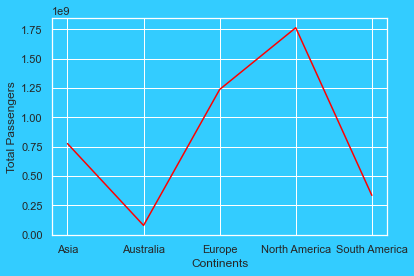

In [52]:
x=e['Continent']
y=e['Total Passengers']
plt.plot(x, y,color='red')
plt.ylabel("Total Passengers")
plt.xlabel("Continents")


##### "North America" is the most visited continent